In [1]:
pip install SimpleITK

     |████████████████████████████████| 42.5 MB 4.3 MB/s eta 0:00:01    |█████                           | 6.7 MB 3.1 MB/s eta 0:00:12     |████████████                    | 15.8 MB 3.1 MB/s eta 0:00:09
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# DRAW MATPLOTLIB IN NOTEBOOK #

#%matplotlib inline
#%matplotlib notebook



# LIBRARIES #

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy import ndimage, optimize

import SimpleITK

In [33]:
# INPUT PARAMETERS #

m_fns = ['tif1/scan1.tif', 'tif1/scan2.tif', 'tif1/scan3.tif', 'tif1/scan4.tif', 'tif1/scan5.tif']


list0 = [799.7, 599.8, 399.9, 299.9, 199.9, 100.0, 50.4, 24.8]

def fitting_func(x, a, b):
    return a * (x**2) + b


# CREATION OF THE MEDIAN IMAGE #

arrays = [0 for i in range(len(m_fns))]

def get_med_img(arr):
    """
        Creates a median array from a list of arrays
        
        :param arr: a list of arrays
        :type arr: list or numpy.array
        :return: the median array
        :rtype: numpy.array
        
        :Example:
        
        >>> import numpy
        >>> a = numpy.array([[7,8,9],[16,17,18]])
        >>> b = numpy.array([[13,14,15],[4,5,6]])
        >>> c = numpy.array([[1,2,3],[10,11,12]])
        >>> print(get_med_img([a, b, c]))
        [[ 7.  8.  9.]
         [10. 11. 12.]]
    """
    l3d = np.array(arr)
    return np.median(l3d, axis=0)

# TIFF images setup
img = SimpleITK.ReadImage(m_fns[0])
sizex = img.GetWidth()
sizey = img.GetHeight()
arrays[0] = SimpleITK.GetArrayFromImage(img)

for i in range(1,len(m_fns)):
    img = SimpleITK.ReadImage(m_fns[i])
    sx = img.GetWidth()
    sy = img.GetHeight()
    assert(sx==sizex and sy==sizey)
    arrays[i] = SimpleITK.GetArrayFromImage(img)

array = get_med_img(arrays)


# replaces every 65535 value in array with 65534 to prevent division by zero:
array[array==65535]=65534
array = array / 65535.0

Text(0.5, 0, 'Color (16 bits / channel)')

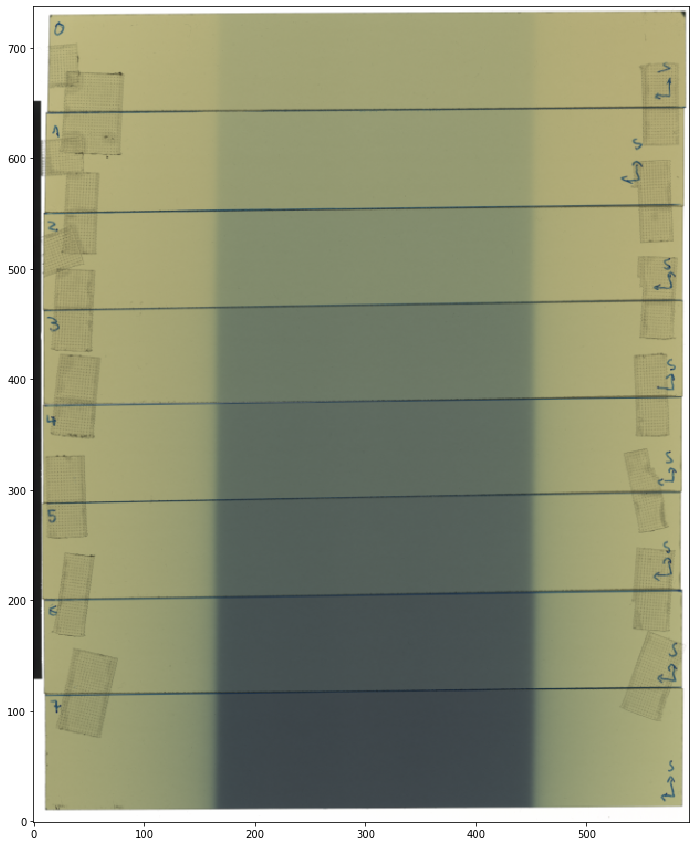

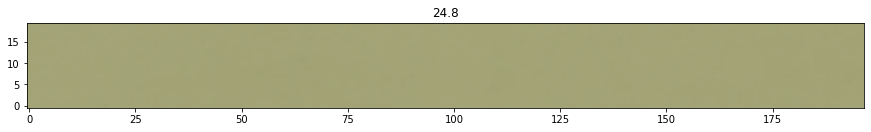

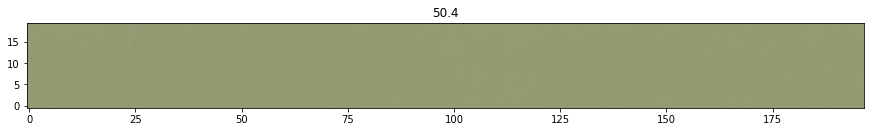

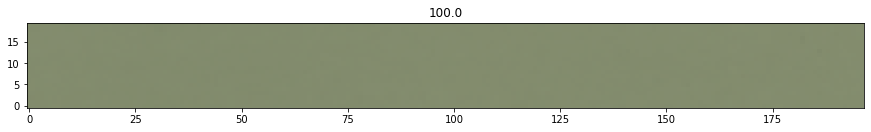

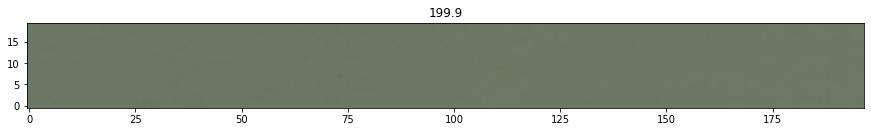

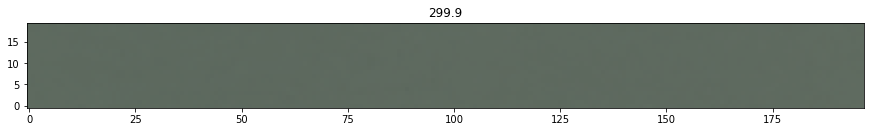

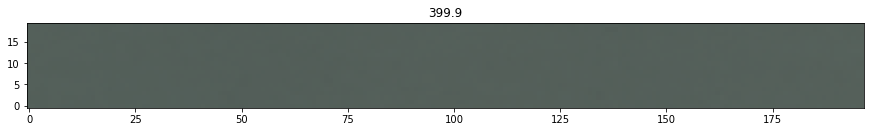

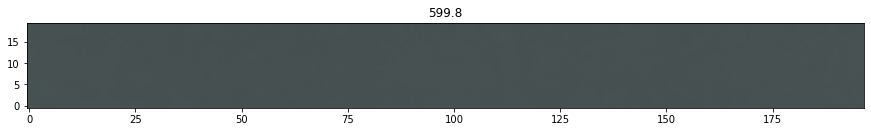

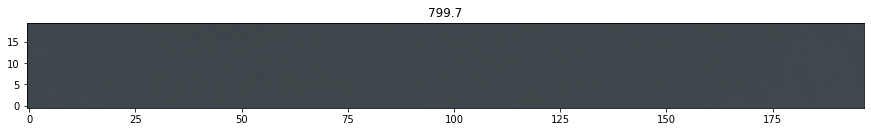

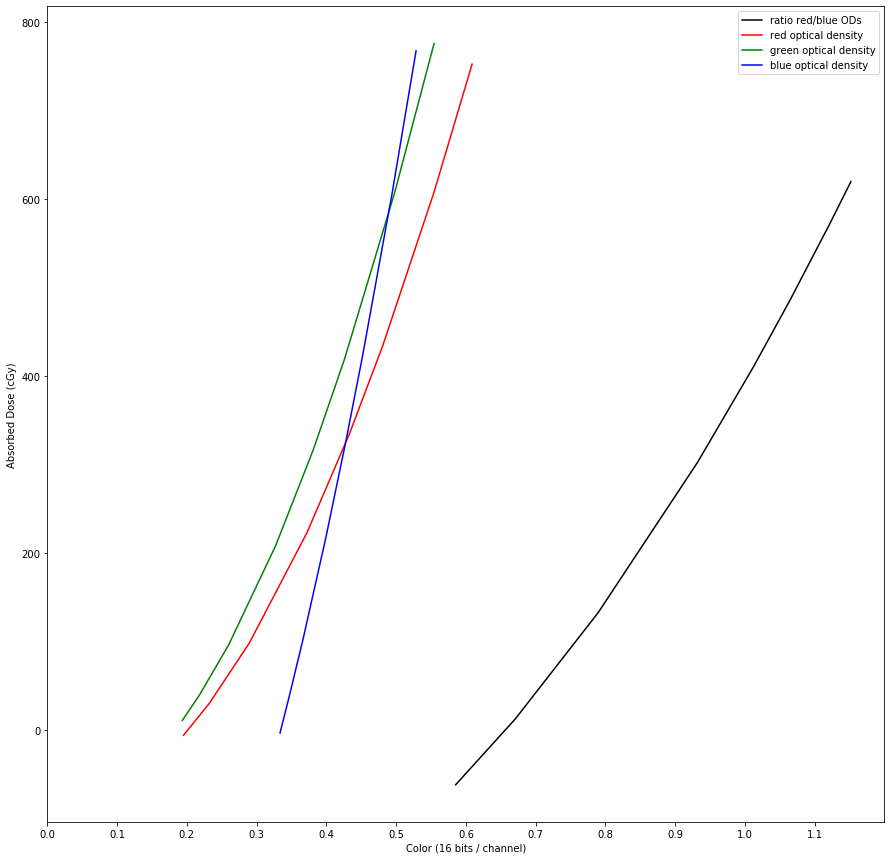

In [38]:
# MATPLOTLIB #
display_strips = True
list1 = [0 for i in range(8)] # list of length 8

plt.rcParams['figure.figsize'] = (15, 15)

# displays the image
fig, ax1 = plt.subplots()
im1 = ax1.imshow(array, origin='lower')

divider1 = make_axes_locatable(ax1)

thirdx = sizex//3 # third of the length of a strip

# splits the image in 8 strips
for i in range(7, -1, -1):
    centy = (2*i+1)*(sizey//8)//2 # mid-height of the current strip
    
    if display_strips:
        fig, ax2 = plt.subplots()
        ax2.imshow(array[centy-10 : centy+10, thirdx : 2*thirdx], origin='lower') # displays the current strip
        ax2.set_title(list0[i])
    
    zoi = array[centy-10 : centy+10, thirdx : 2*thirdx] # zone of interest
    list1[i] = (np.mean(zoi[:,:,0]), np.mean(zoi[:,:,1]), np.mean(zoi[:,:,2]))

list1 = np.array(list1) # contains the median color of each strip

# setups the plot
fig, ax3 = plt.subplots()
dor = -np.log10(list1[:, 0]) # red curve
dog = -np.log10(list1[:, 1]) # green curve
dob = -np.log10(list1[:, 2]) # blue curve
rsb = dor / dob # black curve

params, params_covariance = optimize.curve_fit(fitting_func, rsb, list0)
x_axis = fitting_func(rsb, params[0], params[1])
ax3.plot(rsb, x_axis, "k", label='ratio red/blue ODs')

params, params_covariance = optimize.curve_fit(fitting_func, dor, list0)
x_axis = fitting_func(dor, params[0], params[1])
ax3.plot(dor, x_axis, "r", label='red optical density')

params, params_covariance = optimize.curve_fit(fitting_func, dog, list0)
x_axis = fitting_func(dog, params[0], params[1])
ax3.plot(dog, x_axis, "g", label='green optical density')

params, params_covariance = optimize.curve_fit(fitting_func, dob, list0)
x_axis = fitting_func(dob, params[0], params[1])
ax3.plot(dob, x_axis, "b", label='blue optical density')

ax3.set_xlim(left=0)
xliml, xlimr = ax3.get_xlim()
ax3.set_xticks(np.arange(xliml, xlimr, 0.1))
ax3.legend()
ax3.set_ylabel('Absorbed Dose (cGy)')
ax3.set_xlabel('Color (16 bits / channel)')

Text(0.5, 0, 'Color (16 bits / channel)')

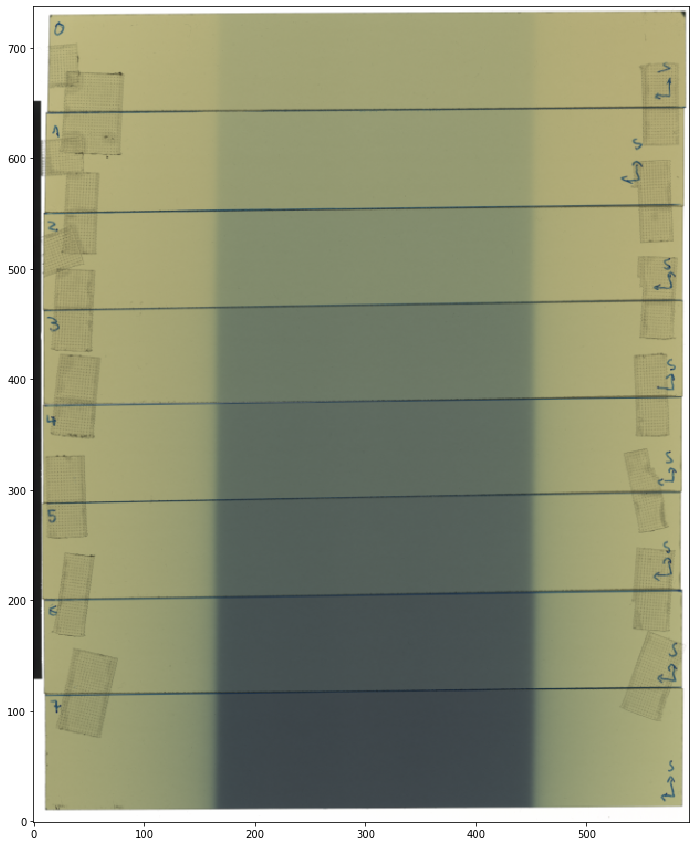

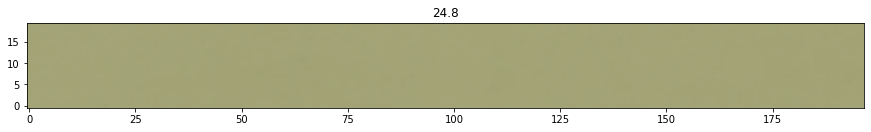

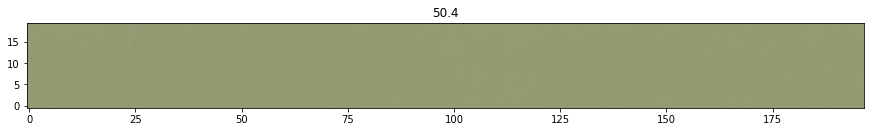

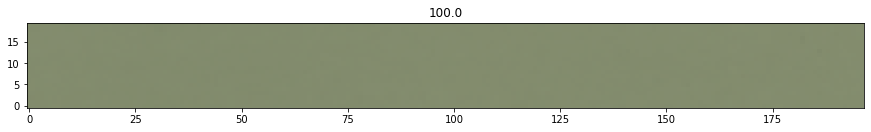

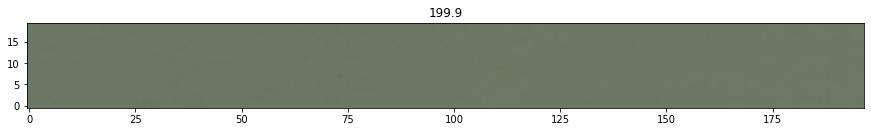

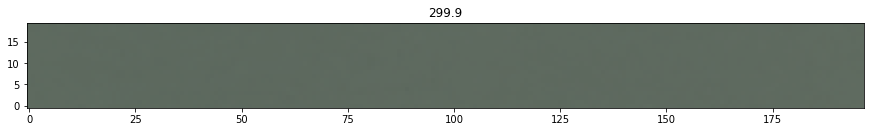

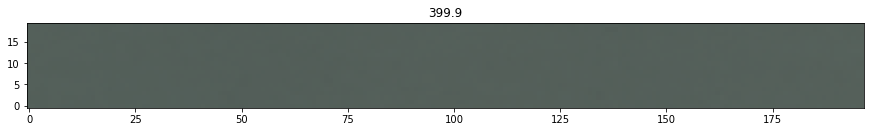

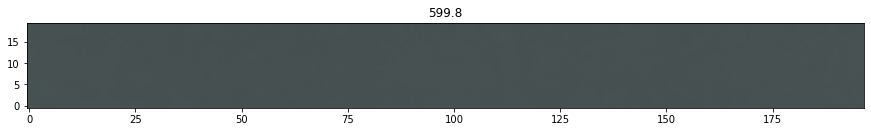

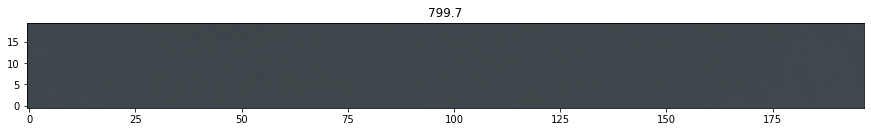

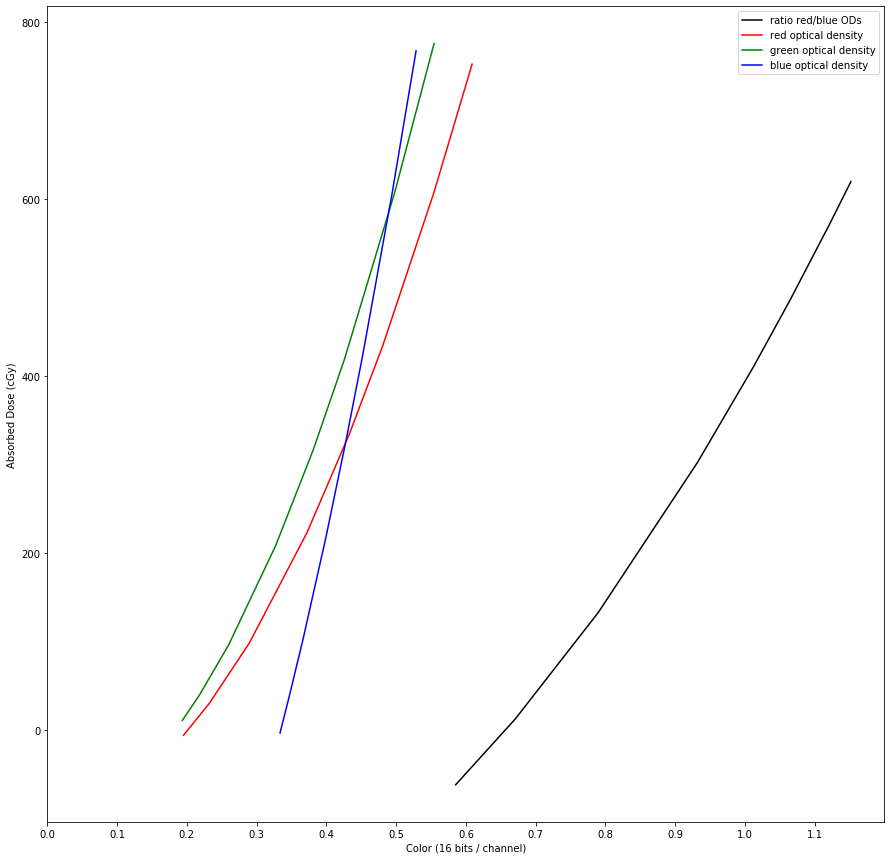

In [42]:
#### Same code with a for loop at the end

# MATPLOTLIB #
display_strips = True
list1 = [0 for i in range(8)] # list of length 8

plt.rcParams['figure.figsize'] = (15, 15)

# displays the image
fig, ax1 = plt.subplots()
im1 = ax1.imshow(array, origin='lower')

divider1 = make_axes_locatable(ax1)

thirdx = sizex//3 # third of the length of a strip

# splits the image in 8 strips
for i in range(7, -1, -1):
    centy = (2*i+1)*(sizey//8)//2 # mid-height of the current strip
    
    if display_strips:
        fig, ax2 = plt.subplots()
        ax2.imshow(array[centy-10 : centy+10, thirdx : 2*thirdx], origin='lower') # displays the current strip
        ax2.set_title(list0[i])
    
    zoi = array[centy-10 : centy+10, thirdx : 2*thirdx] # zone of interest
    list1[i] = (np.mean(zoi[:,:,0]), np.mean(zoi[:,:,1]), np.mean(zoi[:,:,2]))

list1 = np.array(list1) # contains the median color of each strip

# setups the plot
fig, ax3 = plt.subplots()
dor = -np.log10(list1[:, 0]) # red curve
dog = -np.log10(list1[:, 1]) # green curve
dob = -np.log10(list1[:, 2]) # blue curve
rsb = dor / dob # black curve

list1 = [(rsb, 'k', 'ratio red/blue ODs'), (dor, 'r', 'red optical density'), (dog, 'g', 'green optical density'), (dob, 'b', 'blue optical density')]

for e in list1:
    params, params_covariance = optimize.curve_fit(fitting_func, e[0], list0)
    x_axis = fitting_func(e[0], params[0], params[1])
    ax3.plot(e[0], x_axis, e[1], label=e[2])

ax3.set_xlim(left=0)
xliml, xlimr = ax3.get_xlim()
ax3.set_xticks(np.arange(xliml, xlimr, 0.1))
ax3.legend()
ax3.set_ylabel('Absorbed Dose (cGy)')
ax3.set_xlabel('Color (16 bits / channel)')